# Homework 1
This homework consists of three parts, each of which is rated at 10 points:
* Numpy (10 points)
* Matplotlib (10 points)
* Linear Regression (10 points)

The score for each task is described in the comments before the task.

The task is performed independently, otherwise all those involved will receive 0 points :) If you have found a solution to any of the tasks (or part of it) in an open source, you must specify a link to this source in a separate block at the end of your work. Otherwise, **the work will also be rated at 0 points**.

**Deadline: FILL_THE_GAP**

## Part 1. Numpy
It is forbidden to use **while**, **for**, **if** in this part. All operations must be performed in numpy calculation. Recall that using, for example, max instead of np.max is also a suboptimal step. The solution will be counted if it satisfies the conditions above and passes asserts.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
# task 1 (1 point)

"""
description: finds the maximum element in the vector among the elements preceded by zero
input: np.array([0, 2, 0, 3])
output: 3
"""

def max_after_zero(x: np.array) -> int:
    b = x.nonzero() - np.ones_like(x.nonzero())
    c = b[x[b] == 0]
    c += 1
    return x[c].max()


In [ ]:
x = np.array([0, 1, 2, 0, 6, 0, 10, 0])
assert max_after_zero(x) == 10
print("OK")

OK


In [ ]:
# task 2 (1 point)

"""
description: given an image (height, width, numChannels) and weights (numChannels)
Sums the image channels with the specified weights and return the result as
a size matrix (height, width).

Give an example of how the function works – convert a color image to shades of 
gray using np.array coefficients([0.299, 0.587, 0.114]). 
Take a cool picture for the joy of the assistant and draw it 
before and after the transformation.
"""

def grayscale(img: np.array, weights: np.array) -> np.array:
    return np.dot(img, weights)

In [ ]:
img = np.arange(1*2*3).reshape(1, 2, 3)
weights = np.array([0.299, 0.587, 0.114])
res = np.array([[ 0.815,  3.815]])
assert np.allclose(grayscale(img, weights), res)
print("OK")

OK


In [ ]:
# task 3 (2 points)

"""
description: makes up a block matrix of four
blocks, where each block is a given matrix
"""
def block_matrix(block: np.array) -> np.array:
    a = np.concatenate((block,block), axis=0)
    return np.concatenate((a, a), axis=1)


In [ ]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)
print("OK")

OK


In [ ]:
# task 4 (2 points)

"""
description: calculates the product of all
nonzero diagonal elements of a square matrix
"""
def diag_prod(matrix: np.array) -> int:
    a = matrix.diagonal()
    a = a[a != 0]
    return a.prod()

In [ ]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750
print("OK")

OK


In [ ]:
# task 5 (2 points)

"""
description: this class implements StandardScaler from the sklearn library
As input, the fit method accepts a matrix where the signs are arranged in
columns, the fit method must remember mu and sigma for each of the signs,
and the transform must normalize the matrix with the pre-calculated mu and sigma.
"""
class StandardScaler:
    def fit(self, X: np.array):
        self.var = X.var(axis=0)
        self.mean = X.mean(axis=0)
    def transform(self, X: np.array) -> np.array:
        return (X - self.mean)/np.sqrt(self.var)

In [ ]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
scaler = StandardScaler()

scaler.fit(matrix)

assert np.allclose(
    scaler.transform(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)
print("OK")

OK


In [ ]:
# task 6 (2 points)

"""
description: calculates the antiderivative polynomial (take 42 as a constant)
for example, an array of coefficients [6, 0, 1] corresponds to 6x^2 + 1
"""
def antiderivative(coefs: np.array) -> np.array:
    return np.polyint(coefs,1, 42)

In [ ]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 42.])
    )
print("OK")

OK


In [ ]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 42.])
)
print("OK")

OK


## Part 2. Matplotlib

### Task 1 (5 points)
Generate a Gaussian vector of dimension 2 from 100 points (choose mu and sigma on your choice). Check [the three sigma rule](https://en.wikipedia.org/wiki/68-95-99.7_rule): draw a circle centered in mu with a radius such that 0.99 of all points fall there, also draw a circle with a radius of 3 sigma. Draw a point mu in a separate color.

Use subplot to draw histograms with 10 buckets for each dimension and draw a density graph along the histogram.

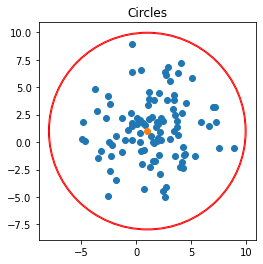

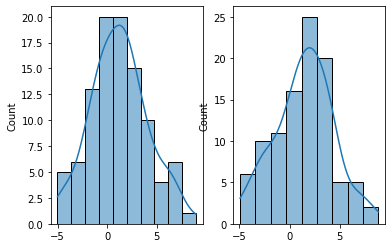

In [ ]:
sigma = 3
mu = 1

x = np.random.normal(mu, sigma, size=(100))
y = np.random.normal(mu, sigma , size=(100))
plt.scatter(x,y)

R = (np.sort(np.sqrt(x**2+y**2))[-2]+np.sort(np.sqrt(x**2+y**2))[-1])/2

circle1 = plt.Circle((mu, mu), R, color='r', fill=False)
circle2 = plt.Circle((mu, mu), 3*sigma, color='r', fill=False)

ax=plt.gca()
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.scatter(mu, mu)
ax.set_title("Circles")
plt.axis('scaled')
plt.show()

fig, (ax1,ax2) = plt.subplots(1,2)
sns.histplot(data=x,kde=True,ax=ax2)
sns.histplot(data=y,kde=True,ax=ax1)

plt.show()

### Task 2 (5 points)

Upload the dataset from the last seminar [fischer's irises](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Build a **heatmap** with correlations between features, rows and columns should be signed with feature names. It is important to use matplotlib. The positive correlation should be displayed in green, the reverse in red, and the absence of correlation in white. Make the plot big enough.

**Hint:** use plt.xticks, plt.yticks, plt.imshow, plt.colorbar

Also build the same heatmap using seaborn.heatmap

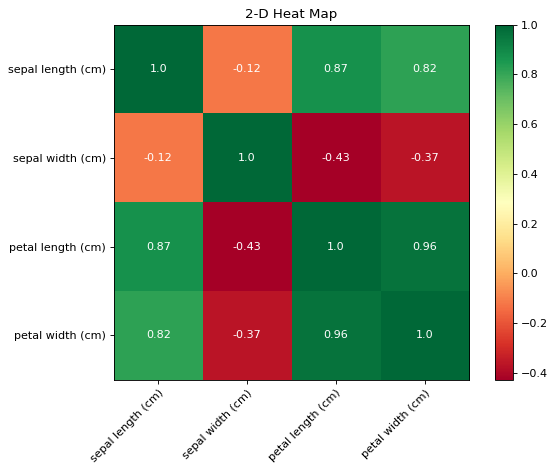

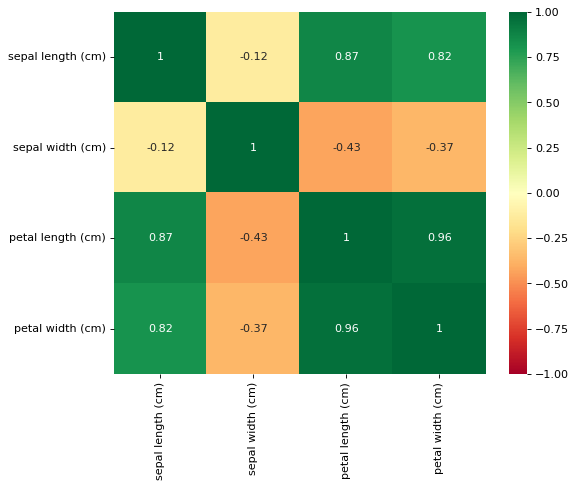

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
data = iris['data']
y = iris['target'].values
name = np.array(iris['feature_names'])
np_corr = np.array(data.corr())

fig, ax = plt.subplots(figsize=(7.5,6), dpi= 80)
im = ax.imshow(np_corr, cmap = 'RdYlGn')
plt.xticks(np.arange(len(name)), labels=name)
plt.yticks(np.arange(len(name)), labels=name)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(name)):
    for j in range(len(name)):
        text = ax.text(j, i, round(np_corr[i, j],2),
                       ha="center", va="center", color="w")

ax.set_title("2-D Heat Map")
fig.tight_layout()

plt.colorbar(im,)
plt.show()

plt.figure(figsize=(7.5,6), dpi= 80)
sns.heatmap(data.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'RdYlGn')

plt.show()

## Part 3. Linear Regression
In this part, you need to implement a class with an analytical solution of linear regression and use all the skills you have acquired.

You are allowed to use any libraries: sklearn, numpy, matplotlib, scipy, etc.

Conclusions are needed for each step, only the code will be rated at 0 points

Load a dataset using np.loadtxt and split it into train and test

In [ ]:
 !wget https://www.dropbox.com/s/kg9px9v3xfysak9/tutorial_dataset.csv

--2022-10-13 16:33:26--  https://www.dropbox.com/s/kg9px9v3xfysak9/tutorial_dataset.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/kg9px9v3xfysak9/tutorial_dataset.csv [following]
--2022-10-13 16:33:26--  https://www.dropbox.com/s/raw/kg9px9v3xfysak9/tutorial_dataset.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8438b6d264255517d3e7066a84.dl.dropboxusercontent.com/cd/0/inline/BuzwsQWeF-_AhiV_8sYqZsUIF9GT8eK4c7SfV6evZxUwniSeBuXzlZrP5tWBmmDn-K_B7HWC0i8Y8vonAlvqLL0tPlrabpuSRkZ8XNMMwpQ3ANVdL73nKTqjix53yebRY6lJfhSjpAz_n2CXcoBj0fJHcz9qKYzPKhyxc9FhkN6RlQ/file# [following]
--2022-10-13 16:33:26--  https://uc8438b6d264255517d3e7066a84.dl.dropboxusercontent.com/cd/0/inline/BuzwsQWeF-_AhiV_8sYqZsUIF9GT8eK4c7SfV6evZxUwniSeBuXzlZrP

In [ ]:
# загружаем данные в файл
data = np.loadtxt('tutorial_dataset.csv', dtype=str)
# обрабатываем наши данные
data_1 = []
data_2 = data[1:].tolist()
for elem in data_2:
  data_1.append(elem.split(","))

data_3 = np.array(data_1).flatten()

data_3 = data_3.astype(np.float)

data_4 = data_3.reshape((-1,6))

Y = data_4[:,0]
X = data_4[:,1:]

from sklearn.model_selection import train_test_split
# делим наши данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=12, shuffle=True)
X_train, X_test = pd.DataFrame(X_train,columns=['x1', 'x2', 'x3','x4','x5']), pd.DataFrame(X_test,columns=['x1', 'x2', 'x3','x4','x5'])



       x1        x2        x3        x4        x5
0     1.0 -0.441970  0.178490  0.186310 -0.276970
1     1.0 -0.217050  0.250800  0.208300  0.061635
2     1.0 -0.557130  0.078136  0.231310  0.209420
3     1.0 -0.202990  0.188640  0.031262  0.270690
4     1.0  0.423370 -0.103180  0.132260 -0.452070
...   ...       ...       ...       ...       ...
1402  1.0 -0.121230  0.128860 -0.239150  0.369400
1403  1.0 -0.133820 -0.438830  0.128980  0.531660
1404  1.0  0.094336  0.238130  0.106220 -0.198560
1405  1.0  0.062093  0.096919  0.294890 -0.080417
1406  1.0 -0.043763 -0.265410 -0.066231  0.003558

[1407 rows x 5 columns]
[-0.43936   0.10871  -1.5037   ...  0.47505   0.094075  1.7906  ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


Plot the dependence of the target on the features and distributions of features, correlations and and everything that you think is important **(2 points)**

In [198]:
# добавляем для удобства работы с pandas
numeric_features = numeric_data.columns


# попытка создать 
#numeric_data = X_train.select_dtypes([np.number])
#numeric_data_mean = numeric_data.mean()

#X_train = X_train.fillna(numeric_data_mean)
#X_test = X_test.fillna(numeric_data_mean)

#correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)

#plot = sns.barplot(y=correlations.index, x=correlations)
#plot.figure.set_size_inches(15, 10)


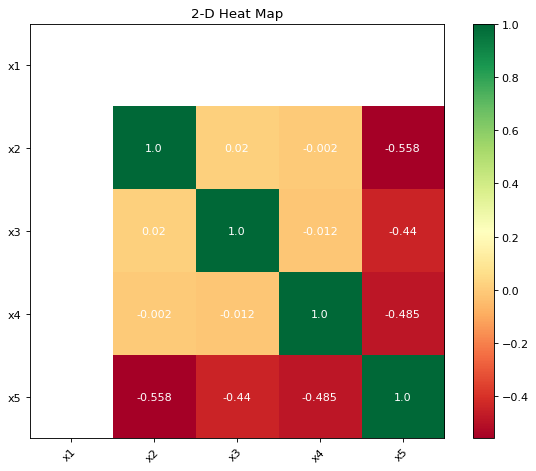

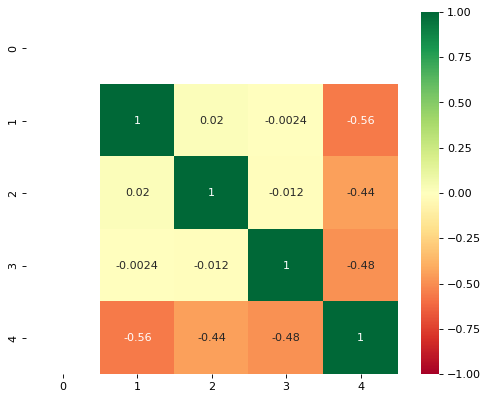

In [ ]:

# пользуемся задачами из Task 2 и создаем тепловую карту
name = np.array(['x1','x2','x3','x4','x5'])
np_corr = np.array(pd.DataFrame(X).corr())
fig, ax = plt.subplots(figsize=(7.5,6), dpi= 80)
im = ax.imshow(np_corr, cmap = 'RdYlGn')
plt.xticks(np.arange(len(name)), labels=name)
plt.yticks(np.arange(len(name)), labels=name)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(name)):
    for j in range(len(name)):
        text = ax.text(j, i, round(np_corr[i, j],3),
                       ha="center", va="center", color="w")

ax.set_title("2-D Heat Map")
fig.tight_layout()

plt.colorbar(im,)
plt.show()

plt.figure(figsize=(7.5,6), dpi= 80)
sns.heatmap(pd.DataFrame(X).corr(), vmin = -1, vmax = +1, annot = True, cmap = 'RdYlGn')

plt.show()

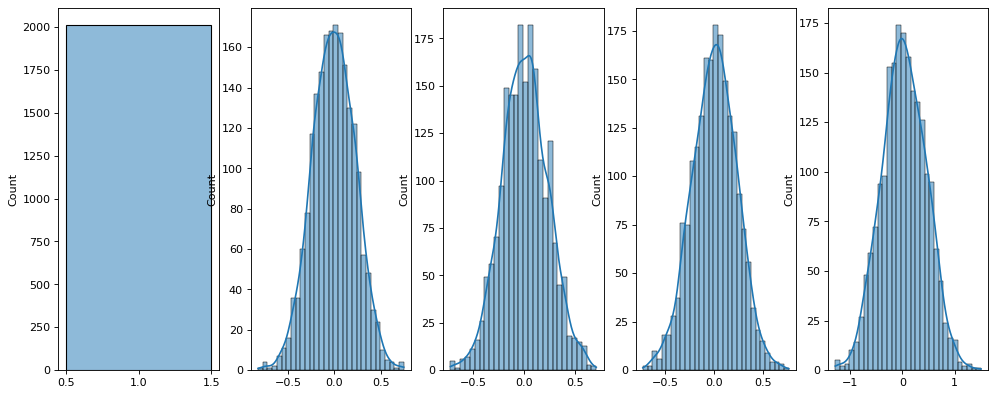

In [ ]:
# строим распределение фичей

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,6), dpi= 80)
sns.histplot(data=X[:,0],kde=True,ax=ax1)
sns.histplot(data=X[:,1],kde=True,ax=ax2)
sns.histplot(data=X[:,2],kde=True,ax=ax3)
sns.histplot(data=X[:,3],kde=True,ax=ax4)
sns.histplot(data=X[:,4],kde=True,ax=ax5)

plt.show()

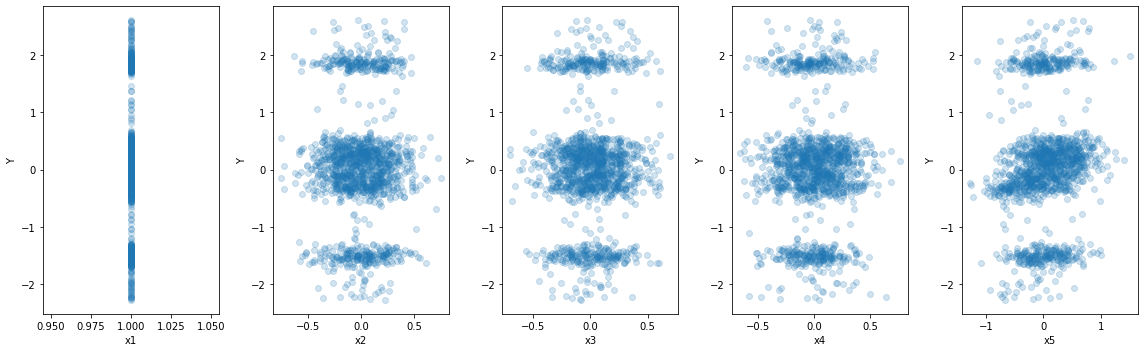

In [ ]:
# строим зависимость таргета от всех фичей

fig, axs = plt.subplots(figsize=(16, 5), ncols=5)
for i, feature in enumerate(X_train[numeric_features]):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Y")
plt.tight_layout()

Implement a linear regression class, normalize features if needed and fit model **(2 points)**

In [ ]:
# реализовываем класс линейной регрессии

class MyLinearRegression:
    def fit(self,X_train, Y_train):
        self.X = X_train
        self.Y = Y_train
        self.W = np.dot(np.dot(np.linalg.inv(np.dot(self.X.T,self.X)),self.X.T),self.Y)
    
    def predict(self,X_test):
      self.pred = np.dot(X_test, self.W)
      return self.pred


        

In [192]:

# нормализуем данные
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train)[:,1:])
X_train_scaled = np.concatenate(([np.array(X_train)[:,0]],X_train_scaled.T),axis=0).T
# обучаем нашу модель 
Reg = MyLinearRegression()
Reg.fit(X_train_scaled,y_train)
# предсказываем на тестовой выборке таргеты
y_pred = Reg.predict(X_test)




In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Как видим, наши метрики различаются. MAE слабо зависит от возможных выбросов нежели MSE, поэтому его ошибка ниже.
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))


1.0216234788427665
0.7047168043614894


Try to come up with a way to understand which feature contributes more to your model **(3 points)**

In [197]:
#Алгоритм ранжирования наших признаков следующий: 
# 1) изначально мы нормализовали данные, чтобы получаемые веса были сбалансированны
# 2) мы обучим модель и удалим признак, чей вес наименьший
# 3) будем повторять данную операцию рекурсивно 
print(Reg.W) # удаляем x1, так как его вес наименьший ([0.0635504  0.25576723 0.1991289  0.2167741  0.45238696])

X_train_scaled_2 = scaler.fit_transform(np.array(X_train)[:,1:])

Reg_2 = MyLinearRegression()
Reg_2.fit(X_train_scaled_2,y_train)

y_pred_2 = Reg_2.predict(np.array(X_test)[:,1:])
print(Reg_2.W) # удаляем x3, так как его вес наименьший ([0.25576723 0.1991289  0.2167741  0.45238696])

X_train_scaled_3 = scaler.fit_transform(np.concatenate(([X_train_scaled_2[:,0]], X_train_scaled_2[:,2:].T), axis=0)).T


#Reg_3 = MyLinearRegression()
#Reg_3.fit(X_train_scaled_3,y_train)

#y_pred_2 = Reg_2.predict(X_test['x1','x2'])
#print(Reg_2.W) 

#В конечном итоге мы получаем, что x5 является наиболее валидной фичей, это согласовывается с результатами тепловой карты



[0.0635504  0.25576723 0.1991289  0.2167741  0.45238696]
[0.25576723 0.1991289  0.2167741  0.45238696]


LinAlgError: ignored

Plot the dependence on the size of the training sample and the mse score **(1 point)**

Выходные данные были обрезаны до нескольких последних строк (5000).
  2.43244347e-02  5.66617985e-02  9.13149833e-02 -3.03205857e-02
  7.66713071e-02 -1.31368872e-01  1.21697742e-01  1.67139412e-02
  2.75598370e-01  1.08579624e-01 -3.14580970e-02  1.32952255e-01
  2.36167523e-02 -2.38129033e-01 -5.73355751e-03 -5.73420221e-02
  2.63181659e-02  1.68924403e-01  1.16347764e-01  3.20452030e-02
  3.92952166e-02  2.59123097e-01  2.96783262e-01  1.62712528e-01
 -1.35821831e-01  1.24057446e-01  1.54751795e-01 -1.12227899e-01
 -9.63271752e-02  1.92441842e-02  2.82141348e-02  3.80805397e-01
  3.22762753e-01 -4.42248013e-02  4.39423629e-03  1.13152620e-01
  1.47117702e-01 -2.58535951e-02  1.57207391e-01  1.38489594e-01
 -5.59001426e-02  2.22904236e-01 -6.06238744e-02]
[ 0.30852493  0.15636275  0.01803961 -0.01649197  0.26929226  0.03416731
  0.15910723 -0.02074697  0.09893886  0.27874688  0.09401177 -0.06439594
 -0.04365728  0.1135901   0.16738763  0.28102122  0.04774441 -0.03939338
  0.1476728  

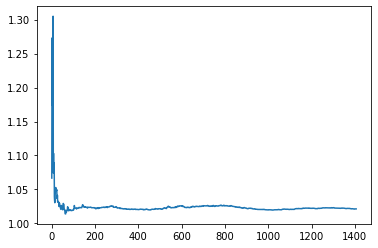

In [ ]:
# В предположении, что распределение данных нормально, без искажений, строим зависимость, каждый раз добавляя новую точку

Ex = MyLinearRegression()
MSE = np.array([])
for i in range(1,len(X_train_scaled)):
  Ex.fit(X_train_scaled[:i],y_train[:i])
  Ex_pr = Ex.predict(X_test)
  print(Ex_pr)
  mse = mean_squared_error(y_test, Ex_pr)

# получаем значения по вертикальной оси
  MSE = np.append(MSE,mse)
# строими график
plt.plot(range(1,len(X_train_scaled)),MSE)


Fit LinearRegression model from sklearn. Try to get the minimum MSE score as possible. Compare results with your model **(1 point)**

In [ ]:
from sklearn.linear_model import LinearRegression
Lin = LinearRegression().fit(X_train,y_train)
LinPred = Lin.predict(X_test)

print(mean_squared_error(y_test, LinPred))
print(mean_absolute_error(y_test, LinPred))
# Результаты модели улучшились, но не сильно. 

0.9963352445896968
0.6749165635408878


Describe the challenges you had to face :) **(1 point)**

In [ ]:
# Write here your thoughts
# тяжело следить за типами данных при работе с массивами
# В целом обработка данных была непростой
